Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [2]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



Reformat the Date Time Columns

In [3]:
import pandas as pd

# Assuming df is your DataFrame containing the datetime column
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week  # Use isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = dataset.set_index("Datetime")  # Corrected to use dataset instead of df
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [4]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Year')

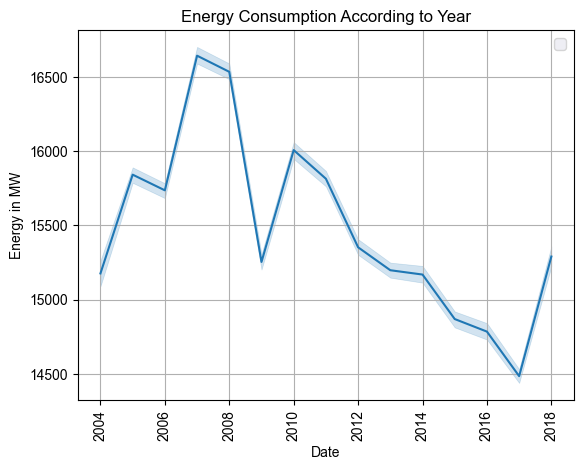

In [5]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


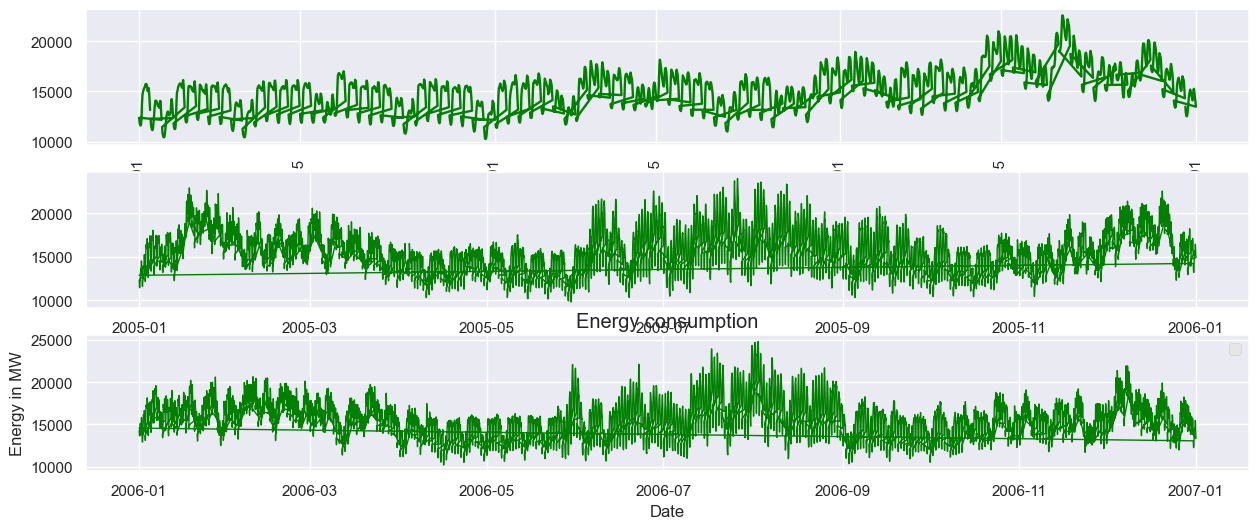

In [6]:
from matplotlib import style
import matplotlib.pyplot as plt

# Filter the dataset DataFrame by year
dataset_2004 = dataset[dataset.index.year == 2004]
dataset_2005 = dataset[dataset.index.year == 2005]
dataset_2006 = dataset[dataset.index.year == 2006]

fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Plot for 2004
ax1.plot(dataset_2004.index, dataset_2004["AEP_MW"], color="green", linewidth=1.7)

# Plot for 2005
ax2.plot(dataset_2005.index, dataset_2005["AEP_MW"], color="green", linewidth=1)

# Plot for 2006
ax3.plot(dataset_2006.index, dataset_2006["AEP_MW"], color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Energy consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

# Rotate x-axis labels for better visibility
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


Energy Distribution

C:\Users\Mayur\AppData\Local\Temp\ipykernel_28928\2760412893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

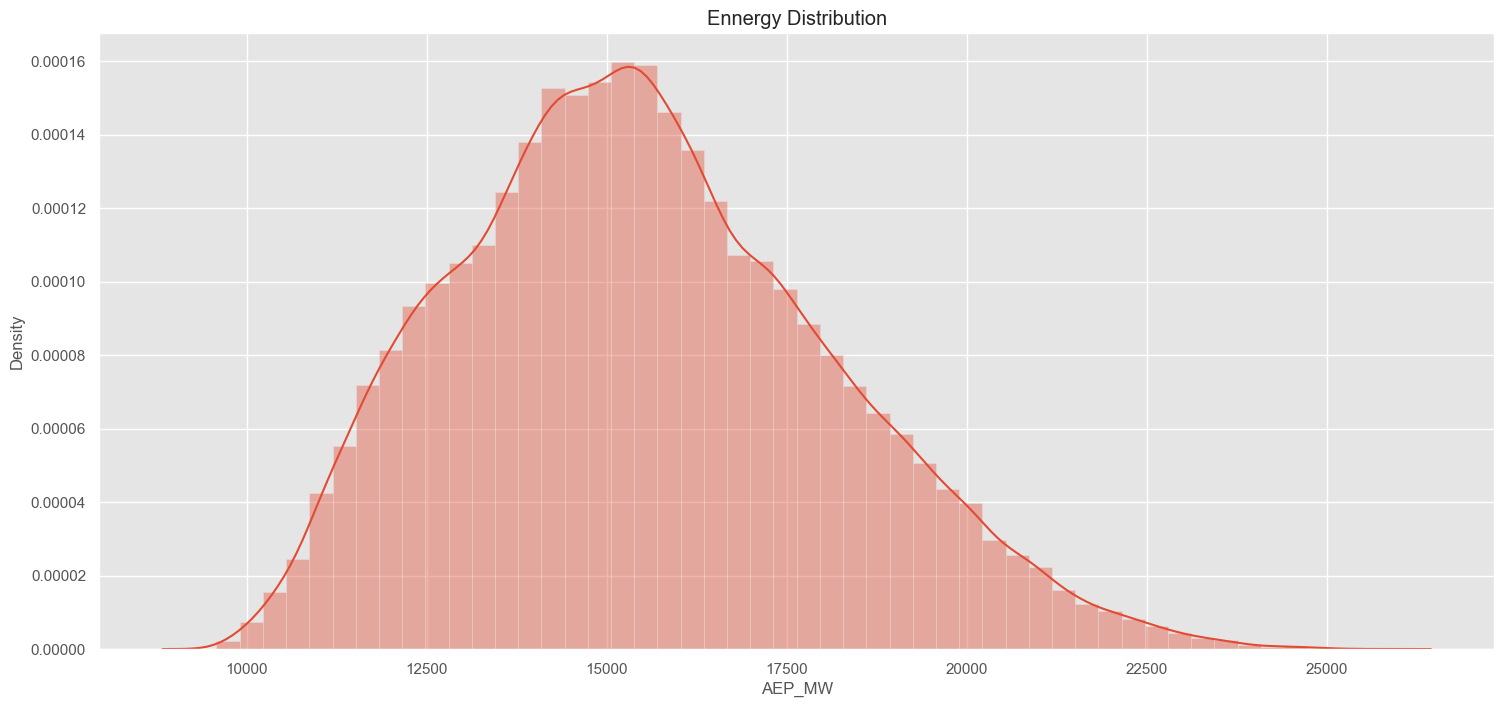

In [7]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [8]:
pd.plotting.register_matplotlib_converters()

Energy Distribution with respect to Datetime

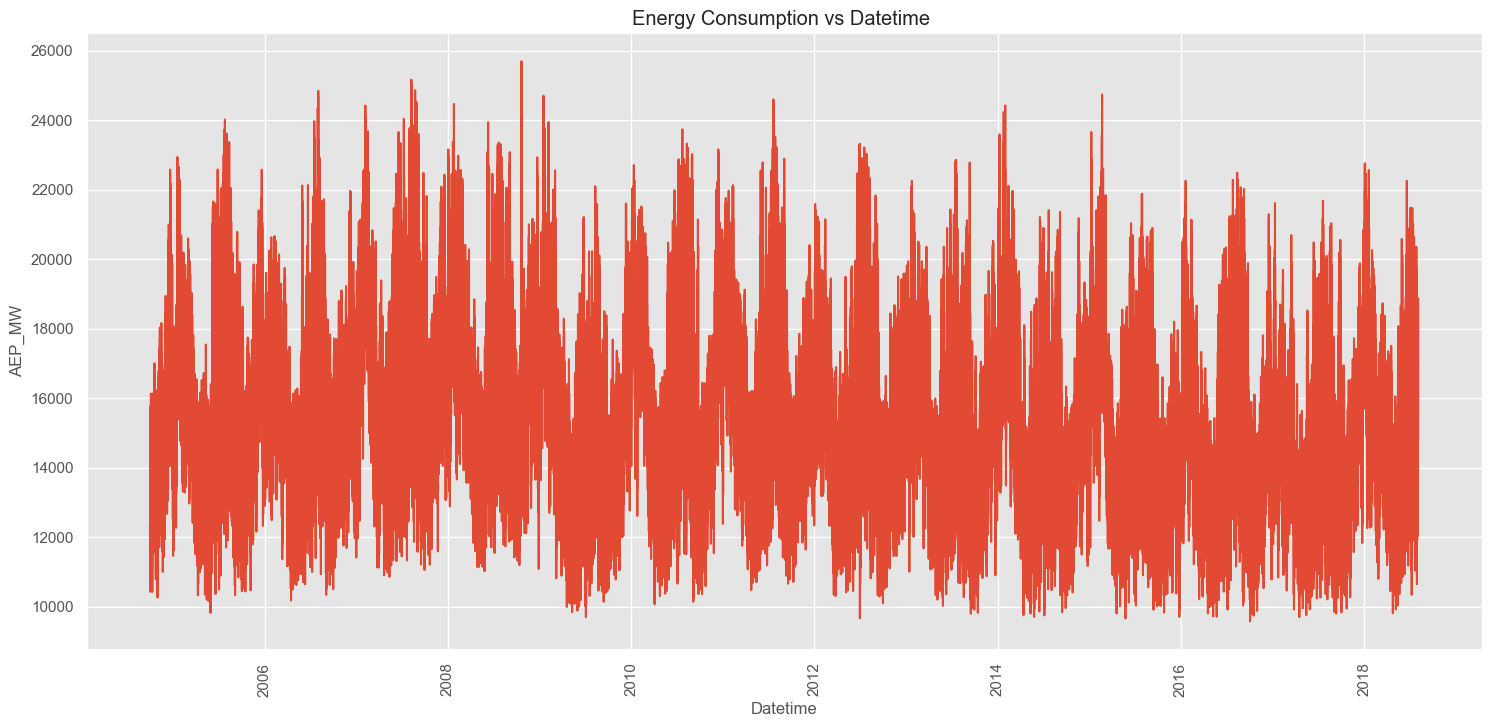

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset is your DataFrame
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Assuming "Time" is categorical data, you might want to specify the order of the categories
sns.lineplot(x='Datetime', y='AEP_MW', data=dataset, ax=ax1)

plt.title("Energy Consumption vs Datetime ")
plt.xlabel("Datetime")
plt.grid(True, alpha=1)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()


Resampleing Data

In [10]:
import pandas as pd

# Assuming 'dataset' is your DataFrame with datetime values
# First, ensure that your datetime column is of datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64'])

# Then, resample and calculate the mean
NewDataSet = numeric_columns.resample('D').mean()


In [11]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 1)


In [12]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [13]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 1)


In [14]:
type(Training_Set.values)

numpy.ndarray

In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [16]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(60, Train.shape[0]):
    
    # X_Train 0-59 
    X_Train.append(Train[i-60:i])
    
    # Y Would be 60 th Value based on past 60 Values 
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [17]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

 Model

In [18]:
from keras.models import Sequential

In [19]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [20]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

c:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0351
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0184
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0182
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0171
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0161
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0161
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0150
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0144
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0117
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0104
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0095
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0083
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0082
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0076
Epoch 15/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 9

Test Data

In [22]:
TestData.head(2)

,AEP_MW
Datetime,
2018-04-26,13157.791667
2018-04-27,12964.000000


In [23]:
TestData.shape

(100, 1)

In [24]:
NewDataSet.shape

(5055, 1)

In [25]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [26]:
Df_Total.shape

(5155, 1)

In [27]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [28]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

c:\Users\Mayur\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step


In [29]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [30]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ]
})

Future Predicted

In [31]:
Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13618.238281
1,2018-04-27,12964.000000,13024.636719
2,2018-04-28,12237.583333,14688.196289
3,2018-04-29,12156.791667,13403.624023
4,2018-04-30,13443.500000,12958.672852
...,...,...,...
95,2018-07-30,15368.083333,15488.593750
96,2018-07-31,15180.291667,15855.418945
97,2018-08-01,15151.166667,15404.500977
98,2018-08-02,15687.666667,15346.421875


In [32]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


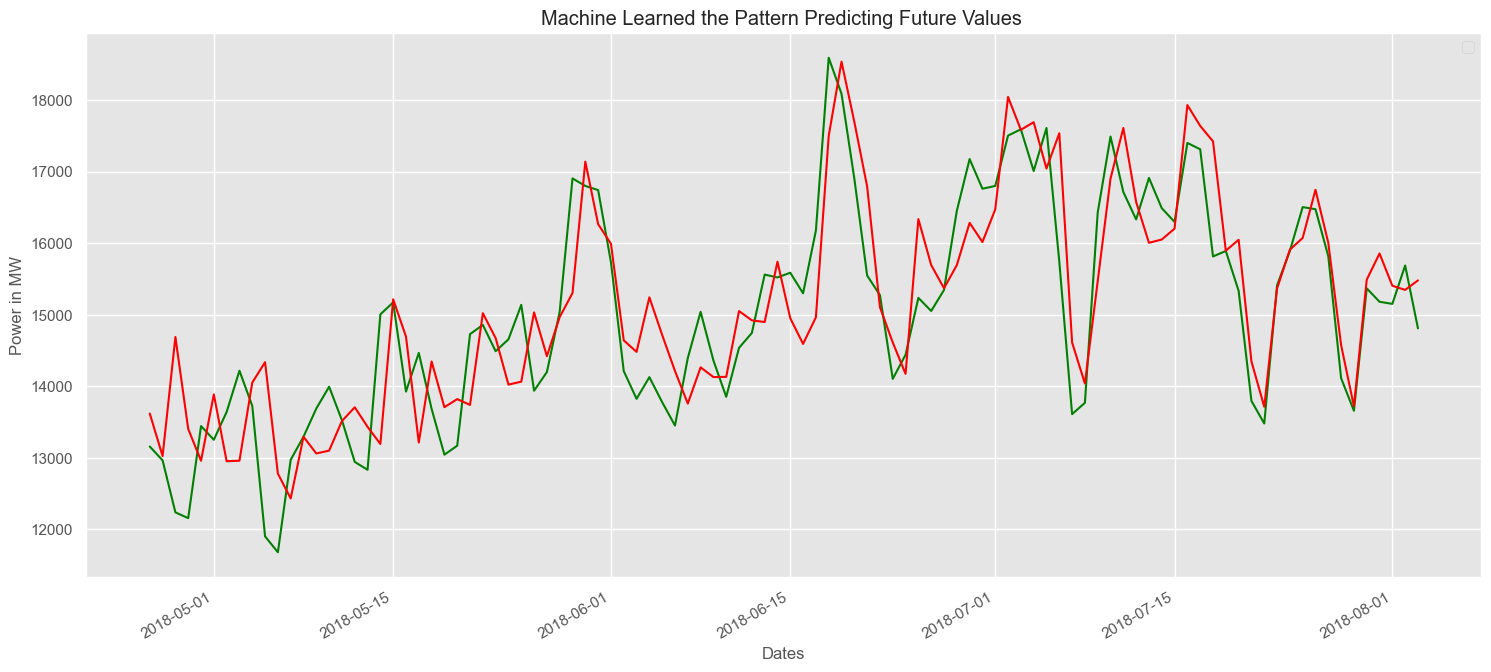

In [33]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

In [34]:
# Store the trained model
regressor.save("lstm_model.h5")
